<a href="https://colab.research.google.com/github/chlitsas/ml-basketball/blob/master/basketball4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import sys
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from random import random
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from tensorflow.keras import layers
from tensorflow.keras import activations

In [2]:
pd.set_option('display.max_columns', None)

data = pd.read_csv(
    'https://liveproject-resources.s3.amazonaws.com/other/deeplearningbasketballscores/Games-Calculated.csv',
    names=['date', 'home_team', 'home_pts', 'road_team', 'road_pts', 'home_avg_pts_for', 'home_avg_pts_against', 'road_avg_pts_for', 'road_avg_pts_against',  'result']
    )
data.head()

,date,home_team,home_pts,road_team,road_pts,home_avg_pts_for,home_avg_pts_against,road_avg_pts_for,road_avg_pts_against,result
0,2015-11-13,Hawaii,87,Montana State,76,87.0,76.0,76.0,87.0,11
1,2015-11-13,Eastern Michigan,70,Vermont,50,70.0,50.0,50.0,70.0,20
2,2015-11-13,Yale,70,Fairfield,57,70.0,57.0,57.0,70.0,13
3,2015-11-13,Central Michigan,89,Jacksonville State,83,89.0,83.0,83.0,89.0,6
4,2015-11-13,Iowa State,68,Colorado,62,68.0,62.0,62.0,68.0,6


In [3]:
train, test = train_test_split(data[['home_avg_pts_for', 'home_avg_pts_against', 'road_avg_pts_for', 'road_avg_pts_against', 'result']], test_size=0.2, random_state=42, shuffle=True)

train_inputs_raw = train[['home_avg_pts_for', 'home_avg_pts_against', 'road_avg_pts_for', 'road_avg_pts_against']].to_numpy()
train_outputs_raw = train[['result']].to_numpy()
test_inputs_raw = test[['home_avg_pts_for', 'home_avg_pts_against', 'road_avg_pts_for', 'road_avg_pts_against']].to_numpy()
test_outputs_raw = test[['result']].to_numpy()
train_inputs_raw

array([[83.16666667, 76.5       , 79.        , 80.33333333],
       [82.33333333, 71.33333333, 69.        , 77.        ],
       [78.82352941, 61.29411765, 68.7       , 73.35      ],
       ...,
       [73.        , 57.        , 66.33333333, 69.66666667],
       [69.        , 60.        , 58.5       , 86.25      ],
       [83.4       , 70.4       , 63.33333333, 70.33333333]])

In [4]:
train_inputs = scale(train_inputs_raw, axis=0, with_mean=True, with_std=True, copy=True )
test_inputs = scale(test_inputs_raw, axis=0, with_mean=True, with_std=True, copy=True )
train_inputs

array([[ 0.64629841,  1.18243785,  1.31115369,  0.56818902],
       [ 0.53791296,  0.43812537, -0.07841195,  0.12806477],
       [ 0.08141898, -1.00812885, -0.12009891, -0.35387128],
       ...,
       [-0.67600401, -1.62674149, -0.44896278, -0.84020858],
       [-1.19625414, -1.19456006, -1.53745586,  1.34940956],
       [ 0.67664633,  0.30366893, -0.86583247, -0.75218373]])

In [7]:
train_outputs = train_outputs_raw
test_outputs = test_outputs_raw
train_outputs

array([[14],
       [ 8],
       [11],
       ...,
       [-8],
       [ 8],
       [12]])

In [5]:
class ModelFitCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch == 0: print('starting', end='')
    elif epoch % 10 == 0: print('.', end='')
    if epoch % 100 == 0: print('')

In [21]:
model = Sequential()  
#model.add(Dense(units=1, input_shape=[4]))
#model.add(Dense(units=1, input_shape=[6], activation='relu'))
#model.add(Dense(units=1, input_shape=[2]))
model.add(Dense(32, activation='relu', input_shape=[4]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
metrics = [
      keras.metrics.MeanAbsoluteError(),
      keras.metrics.Accuracy(),
      keras.metrics.MeanSquaredError()
]
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.1), metrics=metrics)
history = model.fit(train_inputs, train_outputs, epochs=500, validation_split=0.2, verbose=False, callbacks=[ModelFitCallback()])

score, acc, x, y = model.evaluate(test_inputs, test_outputs, batch_size=128)
print(score)
print(acc)
print(x)
print(y)

starting
..........
..........
..........
..........
4032/4032 [==============================] - 0s 6us/step
105.18101186600943
8.12138843536377
0.0
108.47787475585938


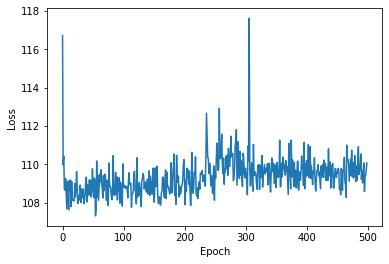

In [22]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'])

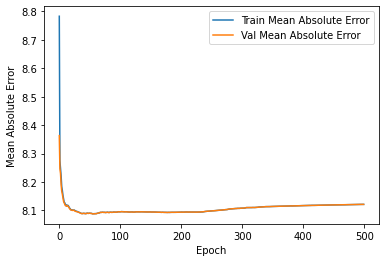

In [23]:
hist = pd.DataFrame(history.history)
# Create an epoch column and set it to the epoch index
hist['epoch'] = history.epoch

def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Absolute Error')
  plt.plot(history['epoch'], history['mean_absolute_error'],
           label='Train Mean Absolute Error')
  plt.plot(history['epoch'], history['val_mean_absolute_error'],
           label = 'Val Mean Absolute Error')
  plt.legend()
  #plt.ylim([0,1])
  plt.show()

plot_history(hist)